# NMME Relative Niño 3.4 (monthly) 
# Tropical mean subtraction from Nino-3.4 is in the URL from IRI Data Library

## Code based on original from Mike Tippett (Columbia Univ):  https://github.com/mktippett/ 


In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Get color order
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
nmme_url = 'https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/'
real_n34_url = 'Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/'
n34_url = 'dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/'\
          'exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/'

In [3]:
model_list = ['CanCM4i', 'COLA-RSMAS-CCSM4', 'GEM-NEMO', 'GFDL-SPEAR', 'NASA-GEOSS2S', 'NCEP-CFSv2','COLA-RSMAS-CESM1']

In [4]:
## Suppress warning
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Load in Observational (ERSSTv5) data from IRI data library -- needed for model rescaling

### Nino-3.4 minus tropical mean

In [5]:
dl_loc = 'SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/'
time_str = 'T/(Jan%201980)/last/RANGE/'
obs_url = 'https://iridl.ldeo.columbia.edu/' + dl_loc + time_str + n34_url + 'zlev/removeGRID/dods'

while True:
        try: 
            print("Trying: ",obs_url)
            ds_obs = xr.open_dataset(obs_url, decode_times=False) #Works with FALSE
            break
        except: 
            print("Exception")
            continue

# replace DL time index with a pandas time index
N = len(ds_obs.T)
ds_obs['T'] = pd.date_range(start='1/1/1980', periods=N, freq='MS')
ds_obs = ds_obs.rename({'T': 'time'})
print(ds_obs)

# Remove 1991-2020 climatology 
base_period = ds_obs.sel(time=slice('1991-01-01', '2020-12-01'))
obsa = ds_obs.sst.groupby('time.month') - base_period.sst.groupby('time.month').mean('time')

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/(Jan%201980)/last/RANGE/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/zlev/removeGRID/dods
<xarray.Dataset>
Dimensions:  (time: 541)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2025-01-01
Data variables:
    sst      (time) float64 ...
Attributes:
    Conventions:  IRIDL


### Traditional Nino-3.4 index 

In [6]:
dl_loc = 'SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/'
time_str = 'T/(Jan%201980)/last/RANGE/'
obs_url = 'https://iridl.ldeo.columbia.edu/' + dl_loc + time_str + real_n34_url + 'zlev/removeGRID/dods'

while True:
        try: 
            print("Trying: ",obs_url)
            ds_obs = xr.open_dataset(obs_url, decode_times=False) #Works with FALSE
            break
        except: 
            print("Exception")
            continue


# replace DL time index with a pandas time index
N = len(ds_obs.T)
ds_obs['T'] = pd.date_range(start='1/1/1980', periods=N, freq='MS')
ds_obs = ds_obs.rename({'T': 'time'})

# Remove 1991-2020 climatology 
base_period = ds_obs.sel(time=slice('1991-01-01', '2020-12-01'))
tradobsa = ds_obs.sst.groupby('time.month') - base_period.sst.groupby('time.month').mean('time')


Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/(Jan%201980)/last/RANGE/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/zlev/removeGRID/dods


## Read model data from IRI Data Library

In [7]:
# We will make a list of data sets and then merge them
ds_list = []

## NEMO5.2

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanSIPS-IC4/.GEM5.2-NEMO/.HINDCAST/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/81/pop/dods
Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanSIPS-IC4/.GEM5.2-NEMO/.FORECAST/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/82/pop/dods
781.0


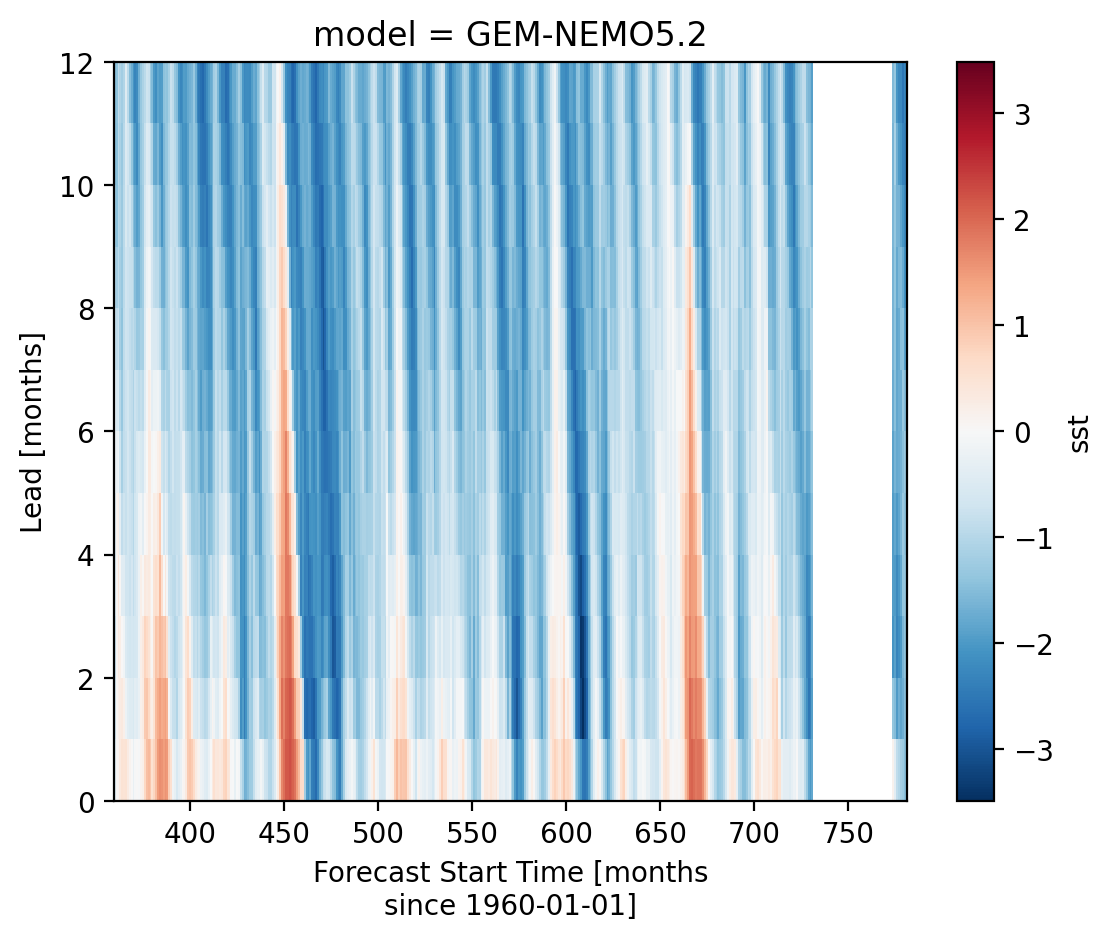

In [8]:
model = 'GEM-NEMO5.2'
h_url = nmme_url + '.CanSIPS-IC4/.GEM5.2-NEMO/.HINDCAST/.MONTHLY/.sst/' + n34_url + '81/pop/dods'
f_url = nmme_url + '.CanSIPS-IC4/.GEM5.2-NEMO/.FORECAST/.MONTHLY/.sst/' + n34_url + '82/pop/dods' 
#h_ds = xr.open_dataset(h_url, decode_times=False)
#f_ds = xr.open_dataset(f_url, decode_times=False)

while True:
        try: 
            print("Trying: ",h_url)
            h_ds = xr.open_dataset(h_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

while True:
        try: 
            print("Trying: ",f_url)
            f_ds = xr.open_dataset(f_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue


# Extract last date from observed record and add padding
pads_da = xr.DataArray(None, coords=dict(S=np.arange(732,774,1),M=np.arange(1,21),L=np.arange(.5,12.5,1)), dims=("S","M","L"))
pads_da = pads_da.to_dataset(name='sst')
ds = xr.concat([h_ds, pads_da,f_ds],dim='S')

ds['Lmax'] = len(h_ds.L)
ds['Mmax'] = len(h_ds.M)

ds.coords['model'] = model
ds = ds.expand_dims('model')

ds.sst.mean('M').plot(x='S');
print(ds.S[-1].values)

In [9]:
ds_list.append(ds)

## CanESM5

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanSIPS-IC4/.CanESM5/.HINDCAST/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/83/pop/dods
Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanSIPS-IC4/.CanESM5/.FORECAST/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/84/pop/dods
781.0


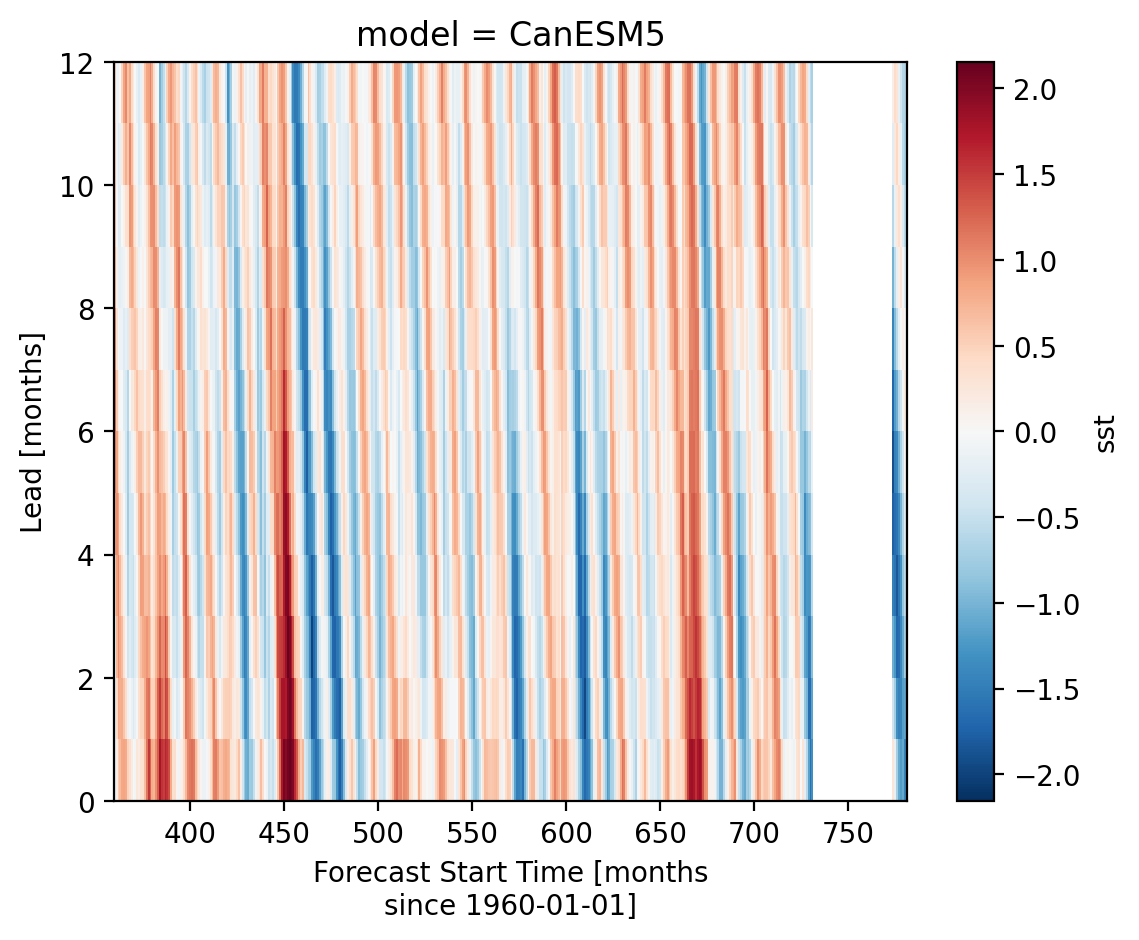

In [10]:
model = 'CanESM5'
h_url = nmme_url + '.CanSIPS-IC4/.CanESM5/.HINDCAST/.MONTHLY/.sst/' + n34_url + '83/pop/dods'
f_url = nmme_url + '.CanSIPS-IC4/.CanESM5/.FORECAST/.MONTHLY/.sst/' + n34_url +'84/pop/dods'
#h_ds = xr.open_dataset(h_url, decode_times=False)
#f_ds = xr.open_dataset(f_url, decode_times=False)


while True:
        try: 
            print("Trying: ",h_url)
            h_ds = xr.open_dataset(h_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

while True:
        try: 
            print("Trying: ",f_url)
            f_ds = xr.open_dataset(f_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue


# Extract last date from observed record and add padding
pads_da = xr.DataArray(None, coords=dict(S=np.arange(732,774,1),M=np.arange(1,21),L=np.arange(.5,12.5,1)), dims=("S","M","L"))
pads_da = pads_da.to_dataset(name='sst')
ds = xr.concat([h_ds, pads_da,f_ds],dim='S')

ds['Lmax'] = len(h_ds.L)
ds['Mmax'] = len(h_ds.M)

ds.coords['model'] = model
ds = ds.expand_dims('model')

ds.sst.mean('M').plot(x='S');
print(ds.S[-1].values)

In [11]:
ds_list.append(ds)

## GFDL-SPEAR

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.HINDCAST/.MONTHLY/.sst_regridded/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/25/pop/dods
Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.FORECAST/.MONTHLY/.sst_regridded/S/(Jan%202021)/last/RANGE/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/29/pop/dods
781.0


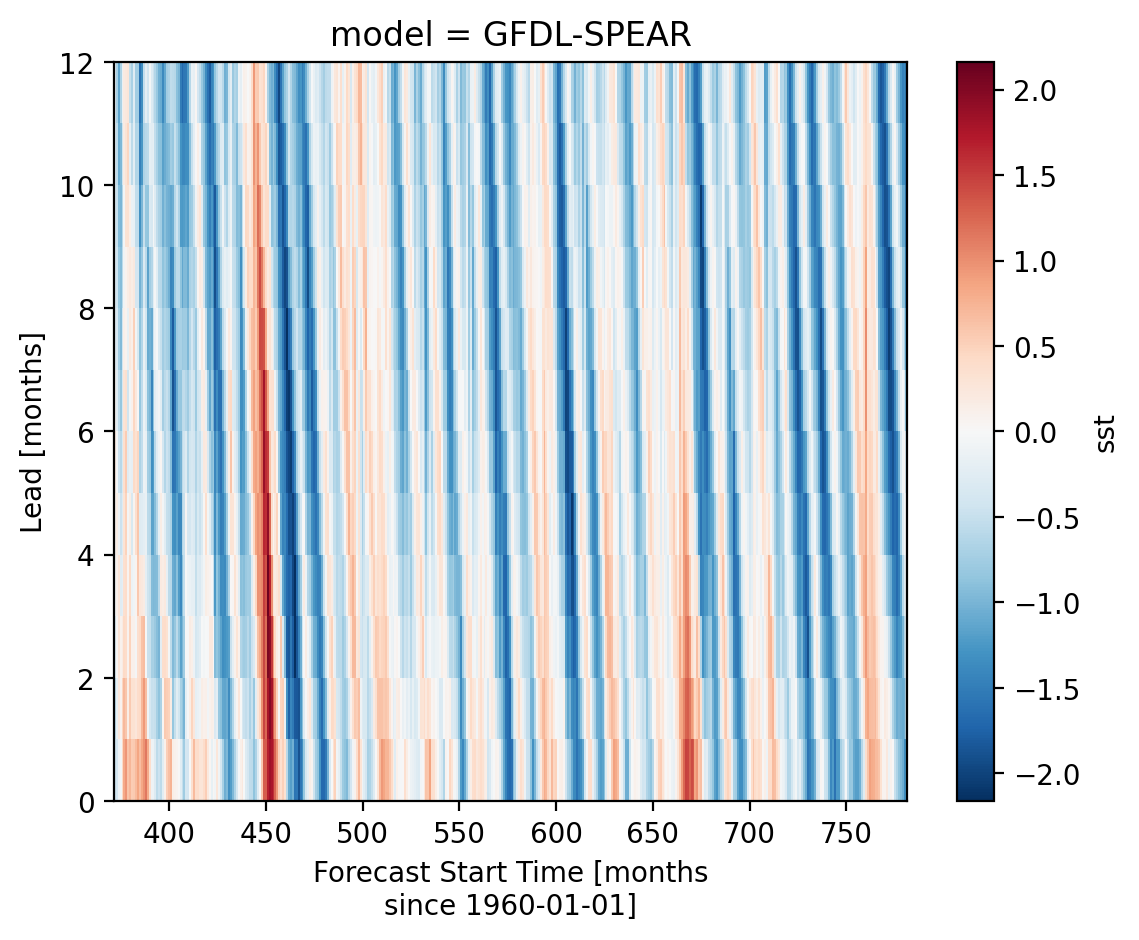

In [12]:
#GFDL-SPEAR
model = 'GFDL-SPEAR'
h_url = nmme_url + '.GFDL-SPEAR/.HINDCAST/.MONTHLY/.sst_regridded/' + n34_url + '25/pop/dods'
f_url = nmme_url + '.GFDL-SPEAR/.FORECAST/.MONTHLY/.sst_regridded/S/(Jan%202021)/last/RANGE/' + n34_url + '29/pop/dods'
#h_ds = xr.open_dataset(h_url, decode_times=False)
#f_ds = xr.open_dataset(f_url, decode_times=False)

while True:
        try: 
            print("Trying: ",h_url)
            h_ds = xr.open_dataset(h_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

while True:
        try: 
            print("Trying: ",f_url)
            f_ds = xr.open_dataset(f_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

ds = xr.concat([h_ds, f_ds], dim='S')
ds = ds.rename({'sst_regridded':'sst'})

ds['Lmax'] = len(h_ds.L)
ds['Mmax'] = len(h_ds.M)

ds.coords['model'] = model
ds = ds.expand_dims('model')

ds.sst.mean('M').plot(x='S');
print(ds.S[-1].values)

In [13]:
ds_list.append(ds)

## COLA-RSMAS-CCSM4

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/44/pop/dods
781.0


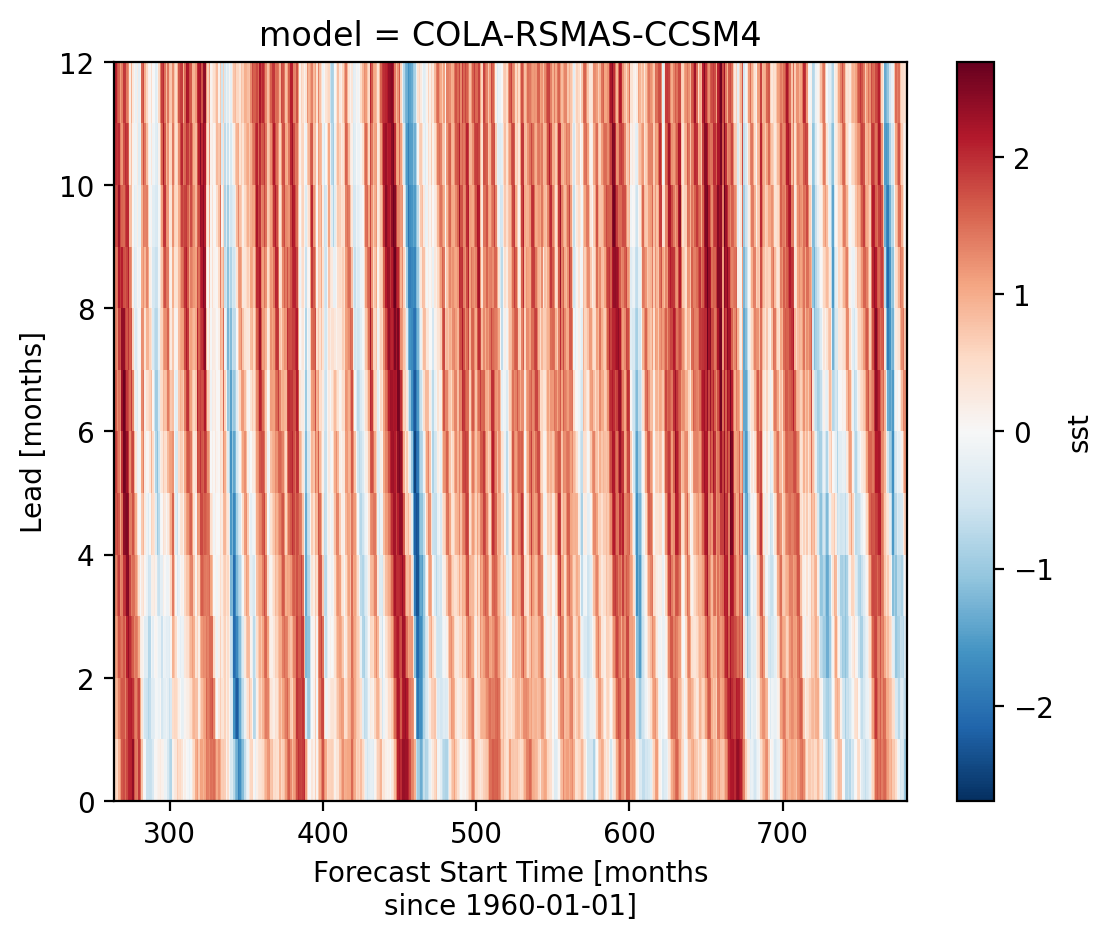

In [14]:
#COLA-RSMAS-CCSM4
model = 'COLA-RSMAS-CCSM4'
url = nmme_url + '.COLA-RSMAS-CCSM4/.MONTHLY/.sst/' + n34_url + '44/pop/dods'
#ds = xr.open_dataset(url, decode_times=False)

while True:
        try: 
            print("Trying: ",url)
            ds = xr.open_dataset(url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

ds['Lmax'] = len(ds.L)
ds['Mmax'] = len(ds.M)

ds.coords['model'] = model
ds = ds.expand_dims('model')

ds.sst.mean('M').plot(x='S');
print(ds.S[-1].values)

In [15]:
ds_list.append(ds)

## NASA-GEOSS2S

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NASA-GEOSS2S/.HINDCAST/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/81/pop/dods
Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NASA-GEOSS2S/.FORECAST/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/23/pop/dods
781.0


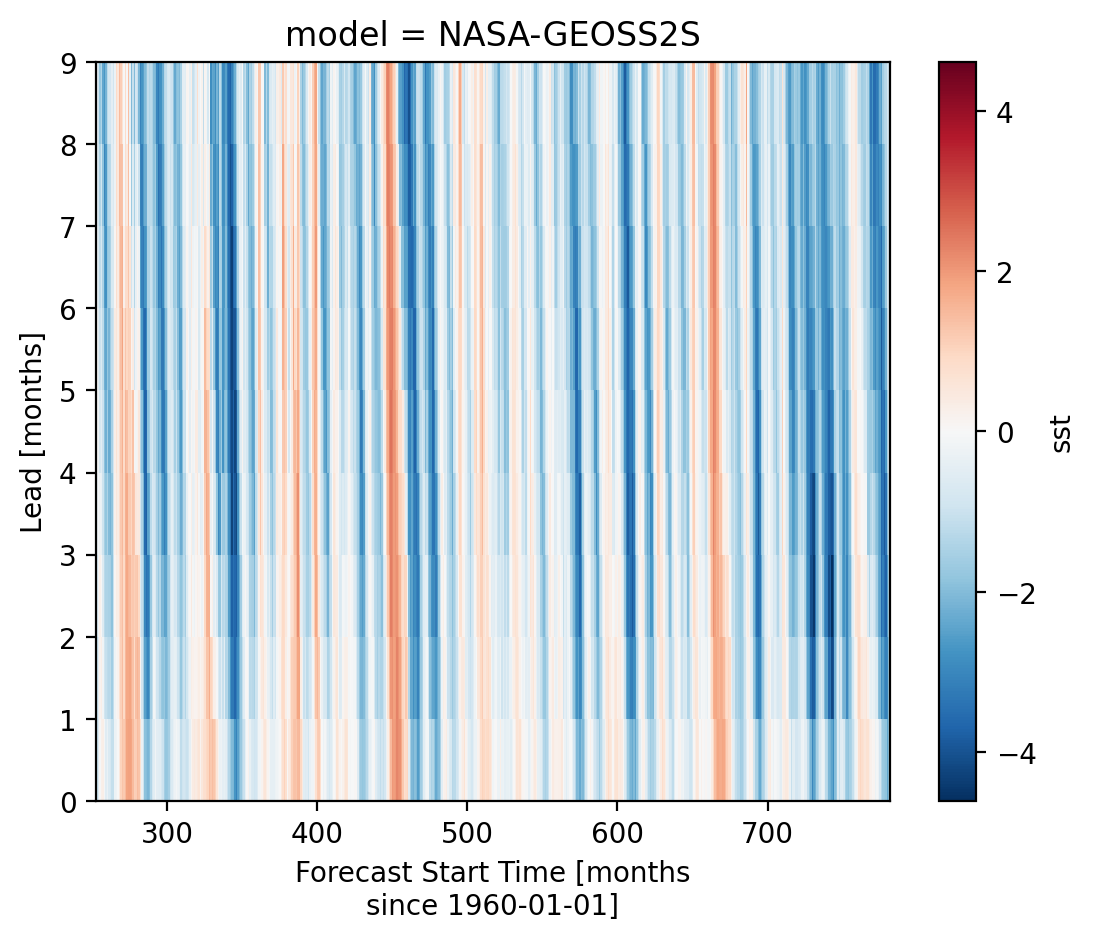

In [16]:
#NASA-GEOSS2S
model = 'NASA-GEOSS2S'

h_url = nmme_url + '.NASA-GEOSS2S/.HINDCAST/.MONTHLY/.sst/' + n34_url +'81/pop/dods'
f_url = nmme_url + '.NASA-GEOSS2S/.FORECAST/.MONTHLY/.sst/' + n34_url +'23/pop/dods'
#h_ds = xr.open_dataset(h_url, decode_times=False)
#f_ds = xr.open_dataset(f_url, decode_times=False)

while True:
        try: 
            print("Trying: ",h_url)
            h_ds = xr.open_dataset(h_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

while True:
        try: 
            print("Trying: ",f_url)
            f_ds = xr.open_dataset(f_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue


ds = xr.concat([h_ds, f_ds], dim='S')

ds['Lmax'] = len(ds.L)
ds['Mmax'] = len(h_ds.M)

ds.coords['model'] = model
ds = ds.expand_dims('model')

ds.sst.mean('M').plot(x='S');
print(ds.S[-1].values)

In [17]:
ds_list.append(ds)

## NCEP-CFSv2

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.HINDCAST/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/dods
Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.FORECAST/.PENTAD_SAMPLES/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/dods
781.0


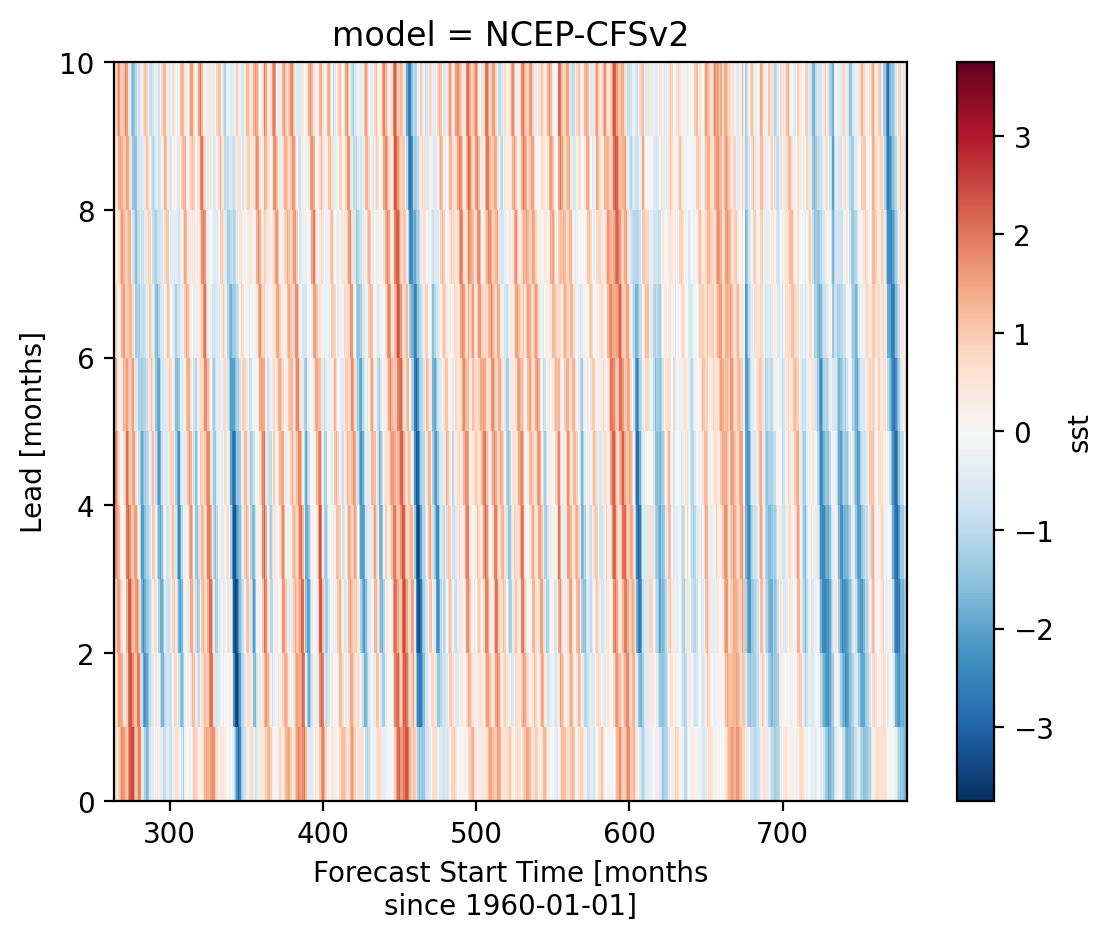

In [18]:
#NCEP-CFSv2
model = 'NCEP-CFSv2'
h_url = nmme_url + '.NCEP-CFSv2/.HINDCAST/.MONTHLY/.sst/' + n34_url +'dods'
f_url = nmme_url + '.NCEP-CFSv2/.FORECAST/.PENTAD_SAMPLES/.MONTHLY/.sst/' + n34_url +'dods'
#h_ds = xr.open_dataset(h_url, decode_times=False)
#f_ds = xr.open_dataset(f_url, decode_times=False)


while True:
        try: 
            print("Trying: ",h_url)
            h_ds = xr.open_dataset(h_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

while True:
        try: 
            print("Trying: ",f_url)
            f_ds = xr.open_dataset(f_url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

ds = xr.concat([h_ds, f_ds], dim='S')

ds['Lmax'] = len(ds.L)
ds['Mmax'] = len(ds.M)
ds['Mmax'] = 24

ds.coords['model'] = model
ds = ds.expand_dims('model')

ds.sst.mean('M').plot(x='S');
print(ds.S[-1].values)

In [19]:
ds_list.append(ds) ##

## COLA-RSMAS-CESM1

Trying:  https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CESM1/.MONTHLY/.sst/dup/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES%5BX/Y%5Daverage/exch/Y/-20/20/RANGEEDGES%5BX/Y%5Daverage/sub/16/pop/dods
781.0


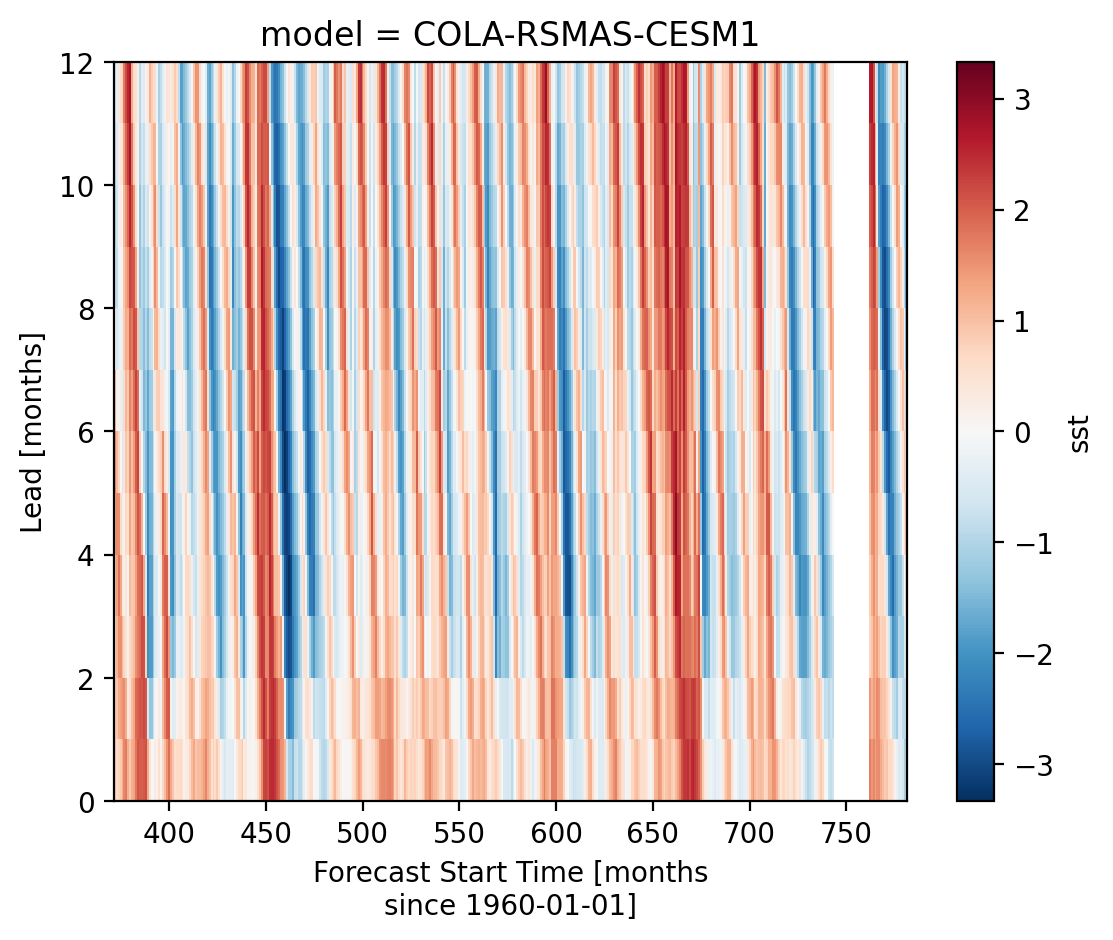

In [20]:
model = 'COLA-RSMAS-CESM1'
url = nmme_url + '.COLA-RSMAS-CESM1/.MONTHLY/.sst/' + n34_url + '16/pop/dods'
#ds = xr.open_dataset(url, decode_times=False)

while True:
        try: 
            print("Trying: ",url)
            ds = xr.open_dataset(url, decode_times=False)
            break
        except: 
            print("Exception")
            continue

ds['Lmax'] = len(ds.L)
ds['Mmax'] = len(ds.M)

ds.coords['model'] = model
ds = ds.expand_dims('model')

ds.sst.mean('M').plot(x='S');
print(ds.S[-1].values)


In [21]:
ds_list.append(ds)

# Multimodel ensemble

In [22]:
ds = xr.merge(ds_list)

## Add Target time and matching observations 

In [23]:
N = len(ds.S)
ds['S'] = pd.date_range(start='2/1/1981',periods=N,freq='MS')


In [24]:
# add a valid time to the forecast dataset
target = np.empty((len(ds.S), len(ds.L)), dtype='datetime64[ns]')

for lead in range(len(ds.L)):
    target[:, lead] = [(ds.S.values[ii] + pd.DateOffset(months=lead)) for ii in range(len(ds.S))]

ds['target'] = (('S', 'L'), target)

In [25]:
# add extra time to the obs
extra_time = np.unique(ds.target)
obsa = obsa.reindex({'time': extra_time})
tradobsa = tradobsa.reindex({'time': extra_time})

# this is where the magic happens
ds['obsa'] = (('S', 'L'), obsa.sel(time=ds.target).data)
ds['tradobsa'] = (('S', 'L'), tradobsa.sel(time=ds.target).data)
ds

<xarray.Dataset>
Dimensions:   (S: 529, M: 30, L: 12, model: 7)
Coordinates:
  * S         (S) datetime64[ns] 1981-02-01 1981-03-01 ... 2025-01-01 2025-02-01
  * M         (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 26.0 27.0 28.0 29.0 30.0
  * L         (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * model     (model) <U16 'COLA-RSMAS-CCSM4' ... 'NCEP-CFSv2'
Data variables:
    sst       (model, S, M, L) object nan nan nan nan nan ... nan nan nan nan
    Lmax      (model) float64 12.0 12.0 12.0 12.0 12.0 9.0 10.0
    Mmax      (model) float64 10.0 10.0 20.0 20.0 15.0 4.0 24.0
    target    (S, L) datetime64[ns] 1981-02-01 1981-03-01 ... 2026-01-01
    obsa      (S, L) float64 -0.2456 -0.3093 -0.1738 -0.2479 ... nan nan nan nan
    tradobsa  (S, L) float64 -0.6398 -0.6353 -0.5288 -0.5742 ... nan nan nan nan
Attributes:
    Conventions:  IRIDL

## Compute Anomalies 

### 1991-2020 climatology

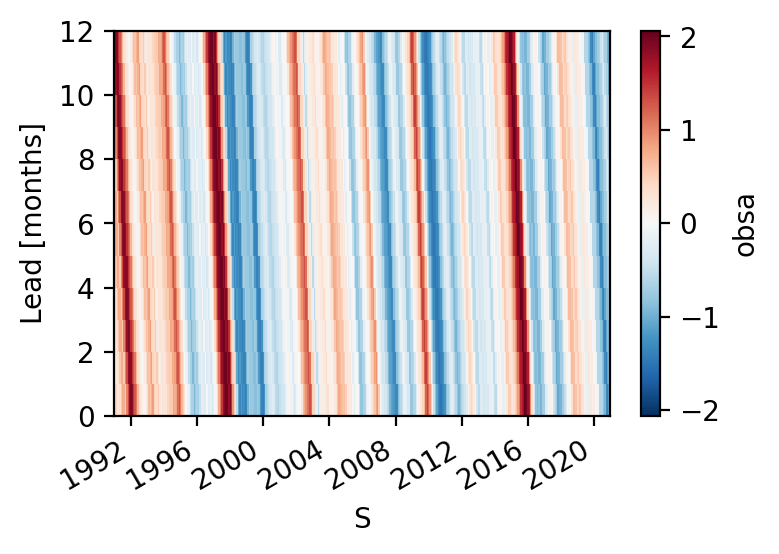

In [26]:
climo_1991_2020 = ds.where( (ds['S.year']>=1991) & (ds['S.year']<=2020)   , drop=True)
climo_1991_2020.obsa.T.plot(figsize=(4, 2.5));

In [27]:
TwoClimModels = ['COLA-RSMAS-CCSM4', 'NCEP-CFSv2','COLA-RSMAS-CESM1']  ## models initialized with CFSR
OneClimModels = ds.model[~ds.model.isin(TwoClimModels)].values
print(TwoClimModels)
print(OneClimModels)

['COLA-RSMAS-CCSM4', 'NCEP-CFSv2', 'COLA-RSMAS-CESM1']
['CanESM5' 'GEM-NEMO5.2' 'GFDL-SPEAR' 'NASA-GEOSS2S']


### Two-climatology models (due to CFSR initial condition jump in 1999-- see Xue et al. 2013 ) https://journals.ametsoc.org/view/journals/clim/26/15/jcli-d-12-00600.1.xml

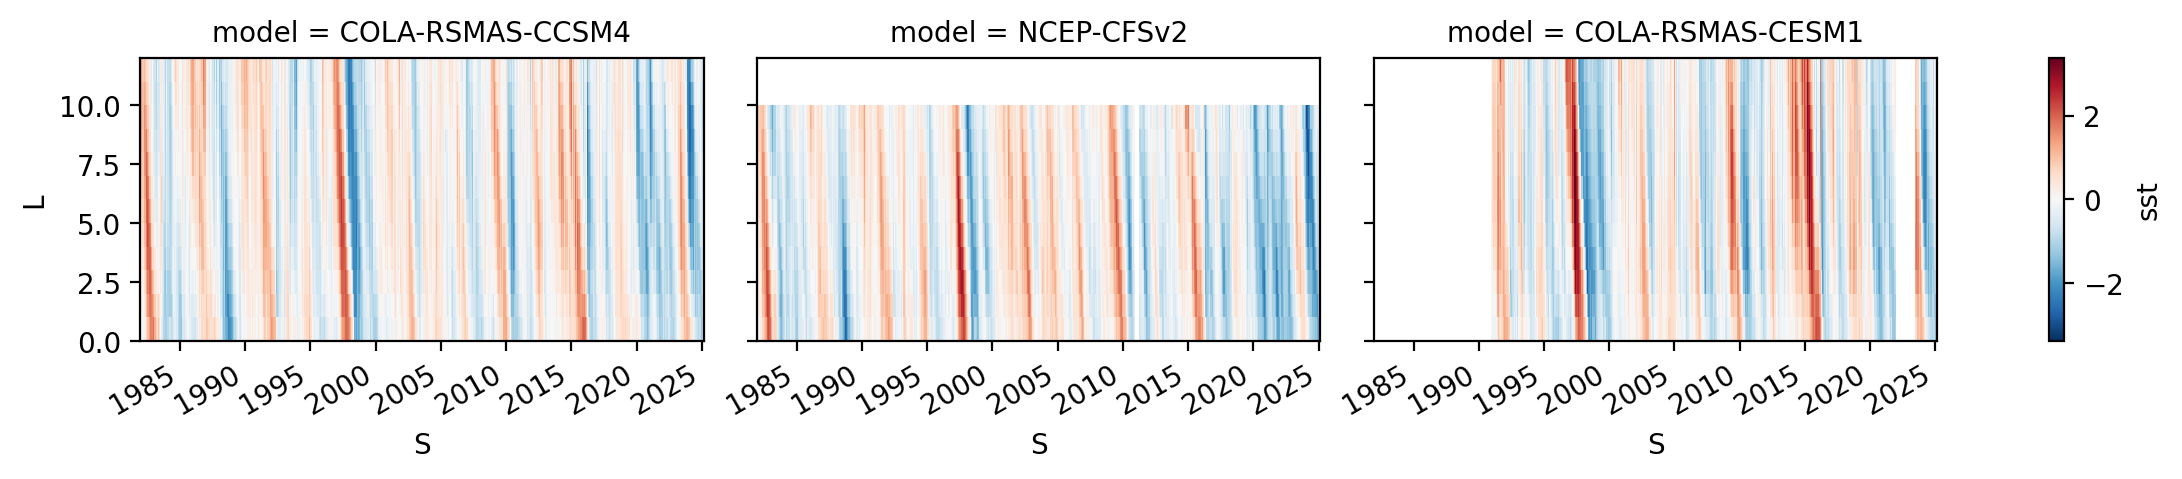

In [28]:
# Suppress/hide the warning
np.seterr(invalid='ignore')

# two climatologies by start
f1 = ds.sel(model=TwoClimModels).sst.sel(S=slice('1982-01-01', '1998-12-01'))
ssta1 = f1.groupby('S.month') - f1.mean('M').groupby('S.month').mean('S')

f2 = ds.sel(model=TwoClimModels).sst.sel(S=slice('1999-01-01', None))
ssta2 = f2.groupby('S.month') - f2.sel(S=slice('1999-01-01', '2020-12-01')).mean('M').groupby('S.month').mean('S')

ssta_TwoClim = xr.concat([ssta1, ssta2], dim='S')
ssta_TwoClim.mean('M').plot(col='model', col_wrap = 3, x='S', figsize=(12, 2.5));


### One-climatology models 

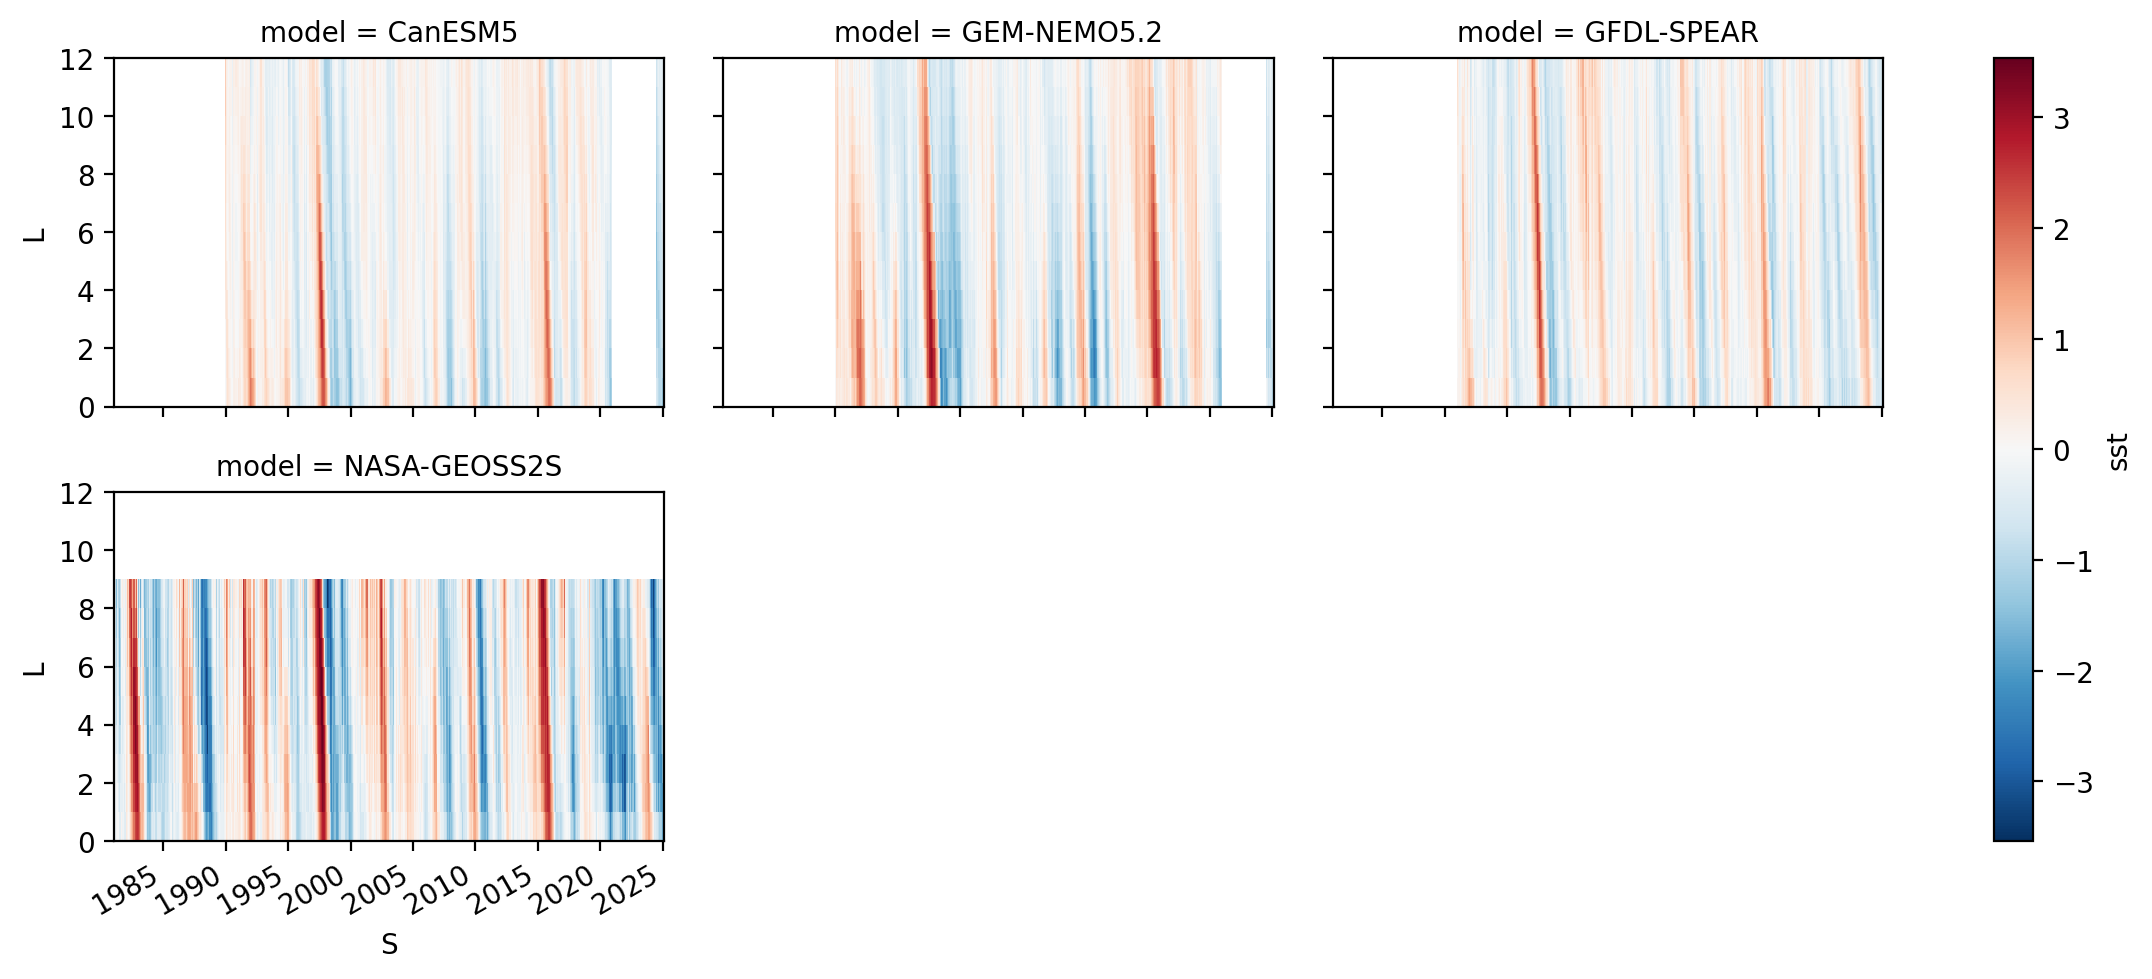

In [29]:
f = ds.sst.sel(model=OneClimModels)
fc = f.where(climo_1991_2020)
ssta_OneClim = f.groupby('S.month') - fc.sst.mean('M').groupby('S.month').mean('S')
ssta_OneClim.mean('M').plot(col='model', col_wrap = 3, x='S', figsize=(12, 5));


### Merge

In [30]:
ssta = xr.concat([ssta_TwoClim, ssta_OneClim], dim='model')
ssta.attrs['long_name'] = 'ssta'

In [31]:
ds['ssta'] = ssta

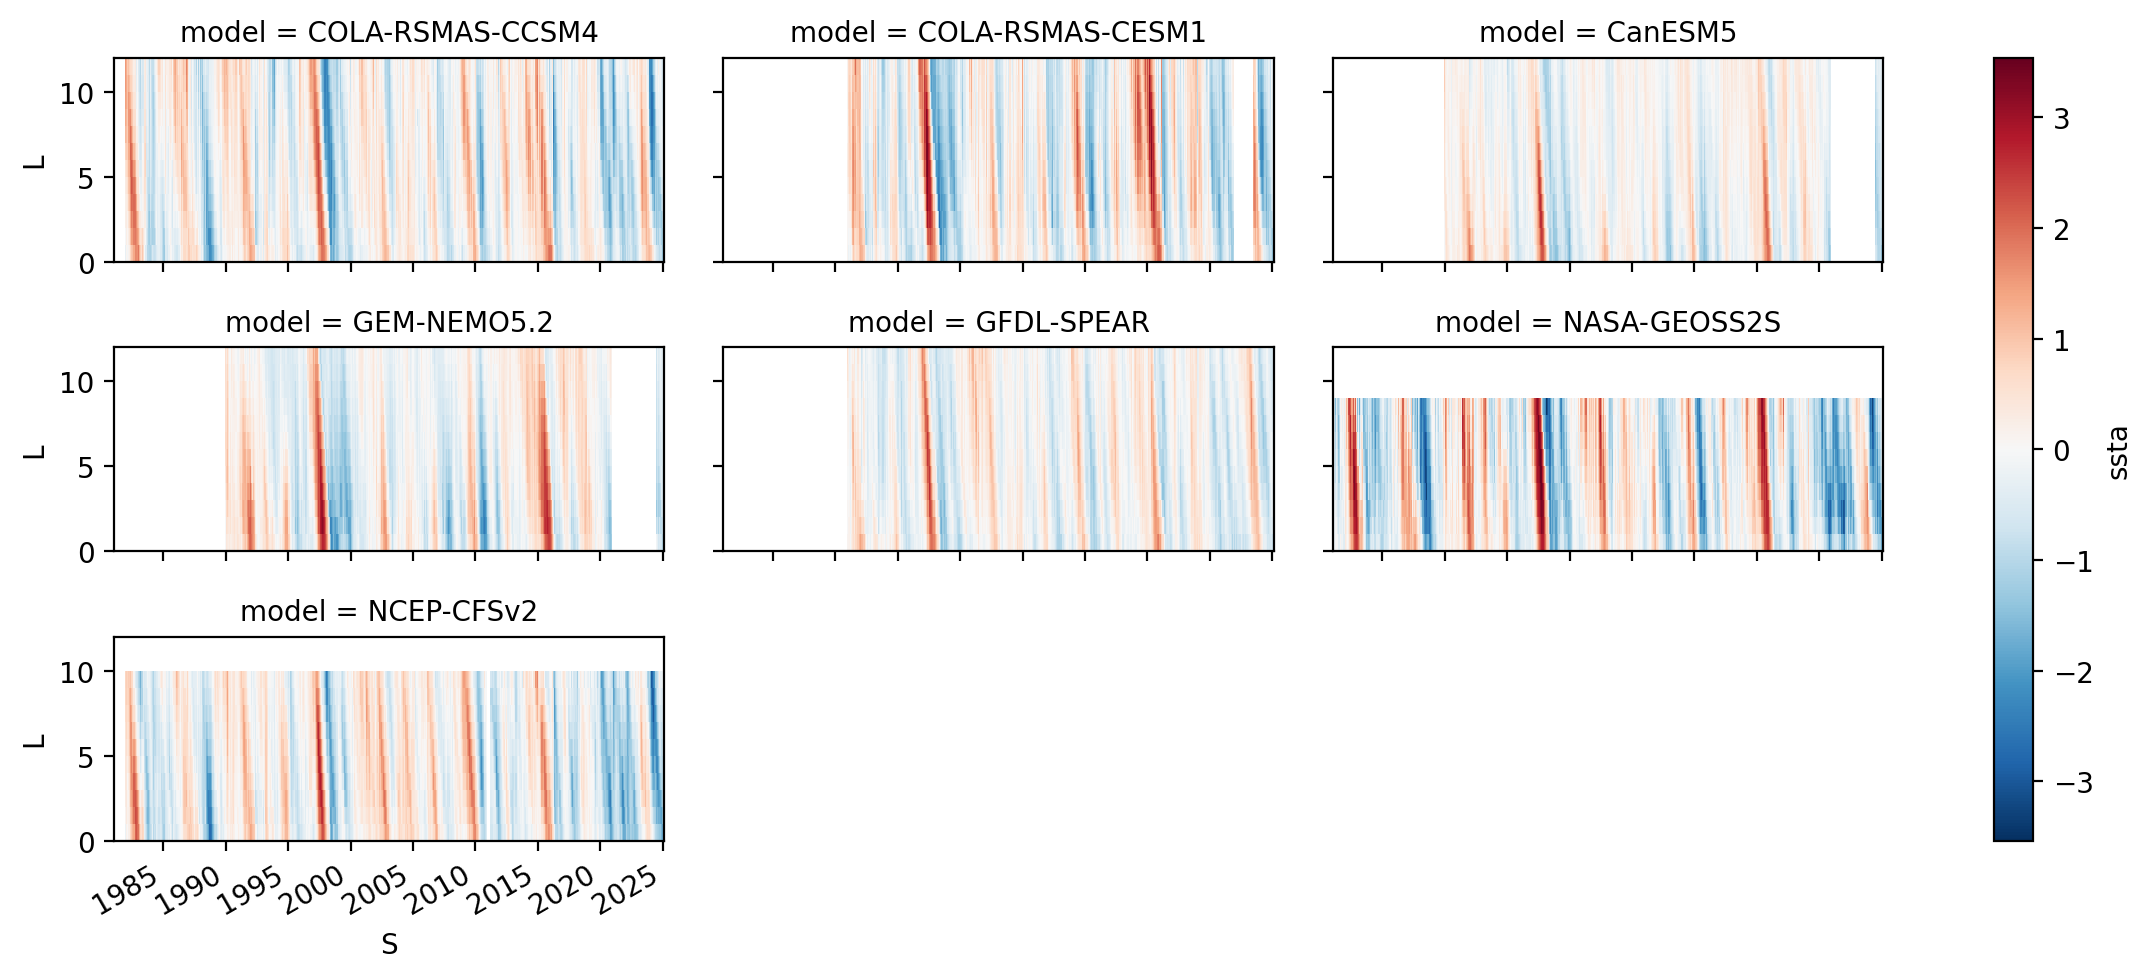

In [32]:
ds.ssta.mean('M').plot(col='model', col_wrap = 3, x='S', figsize=(12, 5));

## Add in Scaling (scaling matches observed variance) 

There are at least two ways of rescaling:
1. Scale the model relative Nino 3.4 variance to match the observed 1991–2020 Nino 3.4 variance.
2. An alternative is to scale the model relative Nino 3.4 variance to match the *model* Nino 3.4 variance.

Currently this code is set up to do #1. 

In [33]:
tst = ds.ssta.where(climo_1991_2020.sst).mean('M').groupby('S.month').std('S')

In [34]:
# Scale by traditional Obsa

scaling_factor = ds.tradobsa.where(climo_1991_2020.tradobsa).groupby('S.month').std('S')
ds['ssta'] = ssta.groupby('S.month') / (ssta.where(climo_1991_2020.sst).mean('M').groupby('S.month').std('S') / scaling_factor)

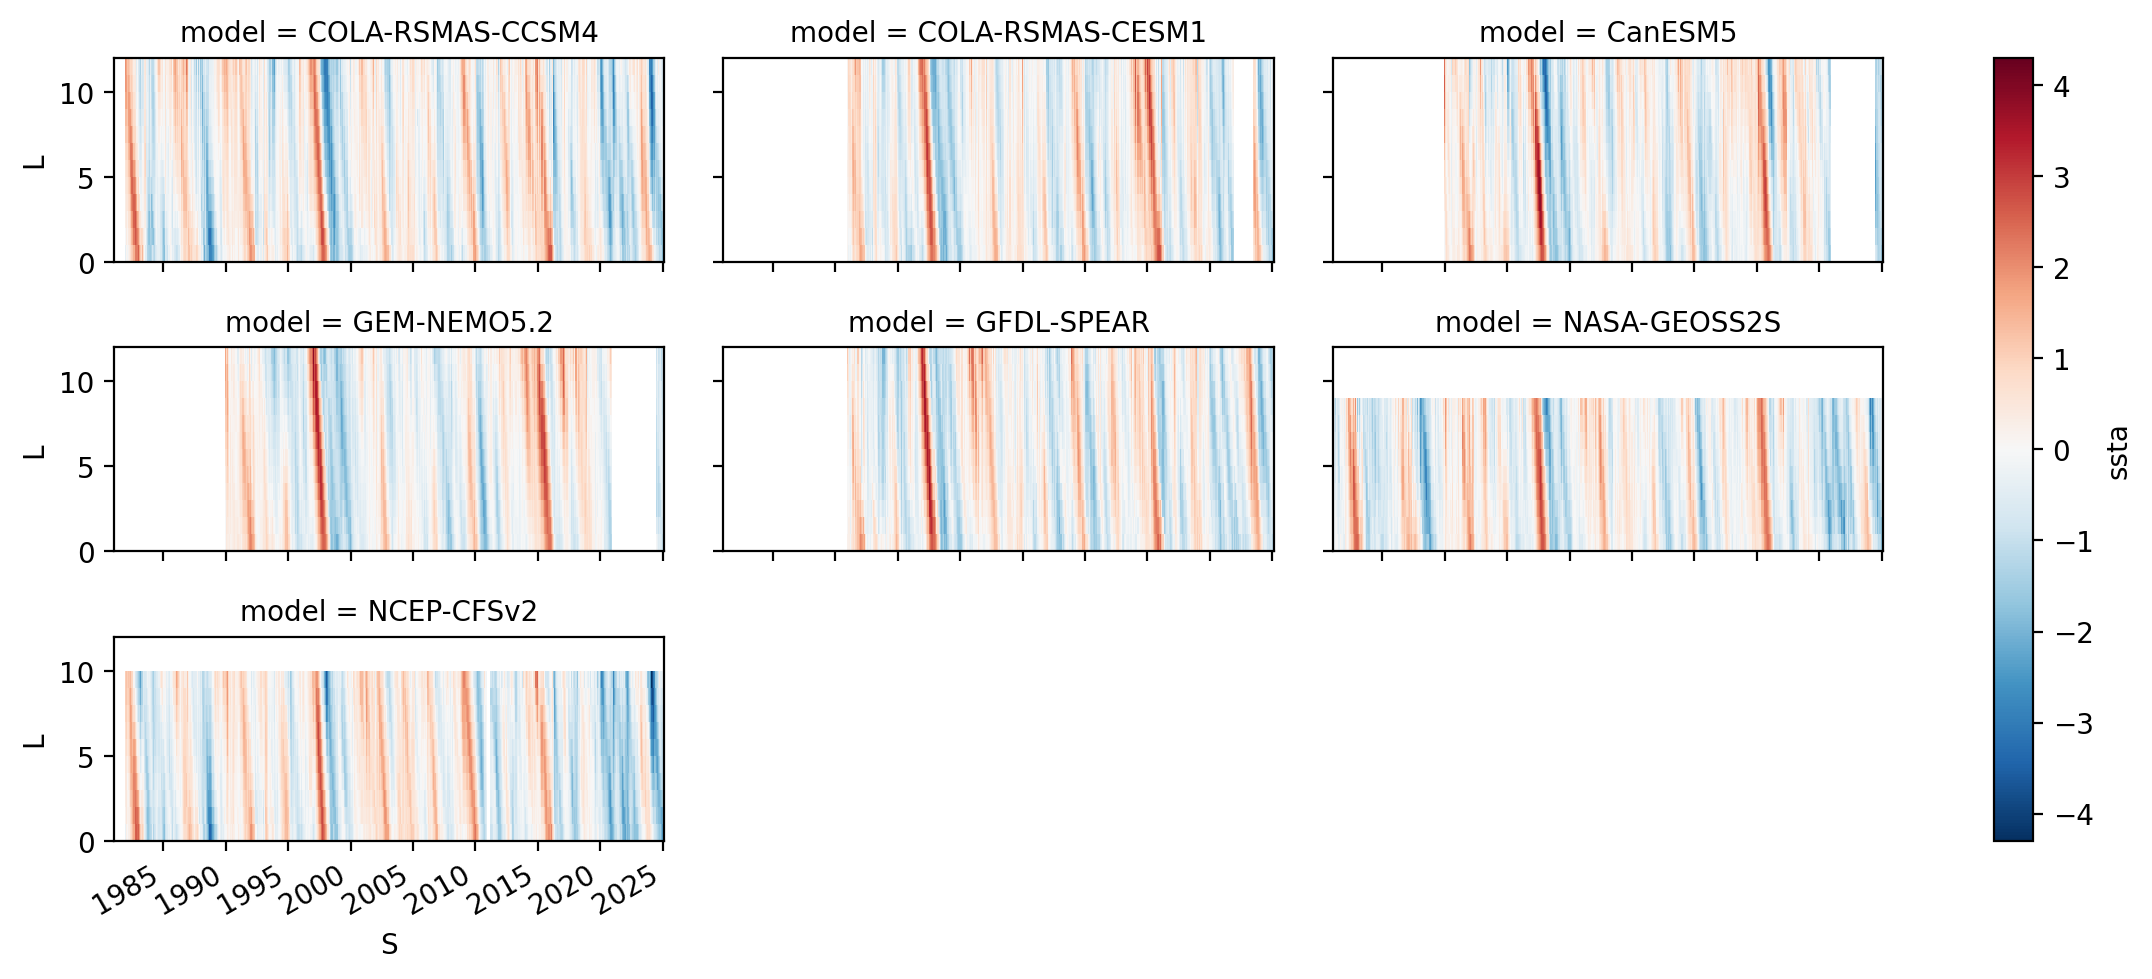

In [35]:
ds.ssta.mean('M').plot(col='model', col_wrap = 3, x='S', figsize=(12, 5));

### Scale observational anomalies

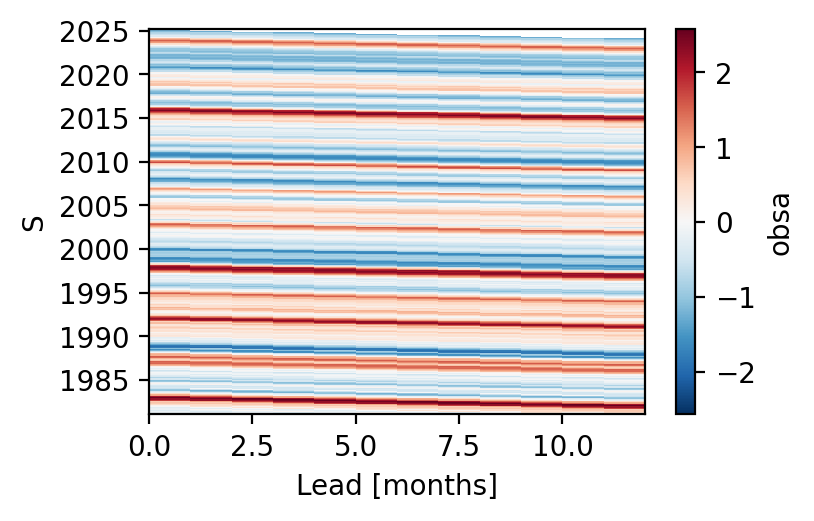

In [36]:
del obsa
ds['obsa']  = ds.obsa.groupby('S.month') / (ds.obsa.groupby('S.month').std('S') / scaling_factor)
ds.obsa.plot(figsize=(4, 2.5));

## Save local copy (or skip)

In [37]:
ds_saved = ds.copy()

import pickle
with open('Rel_n34_nmme_saved_on_disk', 'wb') as f:
    pickle.dump(ds, f, pickle.HIGHEST_PROTOCOL)


## Load in local copy (or skip) 

In [38]:
import pickle
with open('Rel_n34_nmme_saved_on_disk', 'rb') as f:
    ds = pickle.load(f)

# Plot data

## Ensemble mean for each model 

In [39]:
ensm_models = ds.ssta.mean('M')
ensm_models = ensm_models.to_dataset()
# Append obs 
ensm_models = xr.merge([ensm_models, ds.obsa])
ensm_models = ensm_models.transpose('model','L','S')
ensm_models = ensm_models.drop_vars("month", errors="ignore")

## Append NMME model average (assumes 1 model, 1 vote)

In [40]:
avmodels = ensm_models.ssta.mean('model')
new_dat_expanded = avmodels.expand_dims(dim={"model": ["NMME"]})
# Expand ensm_models to match the new model dimension size
new_ssta = xr.concat([ensm_models["ssta"], new_dat_expanded], dim="model")
ensmNMME = new_ssta.to_dataset(name='ssta')
# Add back in obsa 
ensmNMME['obsa']=ensm_models['obsa']
print(ensmNMME)

<xarray.Dataset>
Dimensions:  (S: 529, L: 12, model: 8)
Coordinates:
  * S        (S) datetime64[ns] 1981-02-01 1981-03-01 ... 2025-01-01 2025-02-01
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * model    (model) object 'COLA-RSMAS-CCSM4' 'COLA-RSMAS-CESM1' ... 'NMME'
Data variables:
    ssta     (model, L, S) float64 nan nan nan nan ... -0.84 -0.739 -0.5847
    obsa     (L, S) float64 -0.3035 -0.3846 -0.2029 -0.2624 ... nan nan nan nan


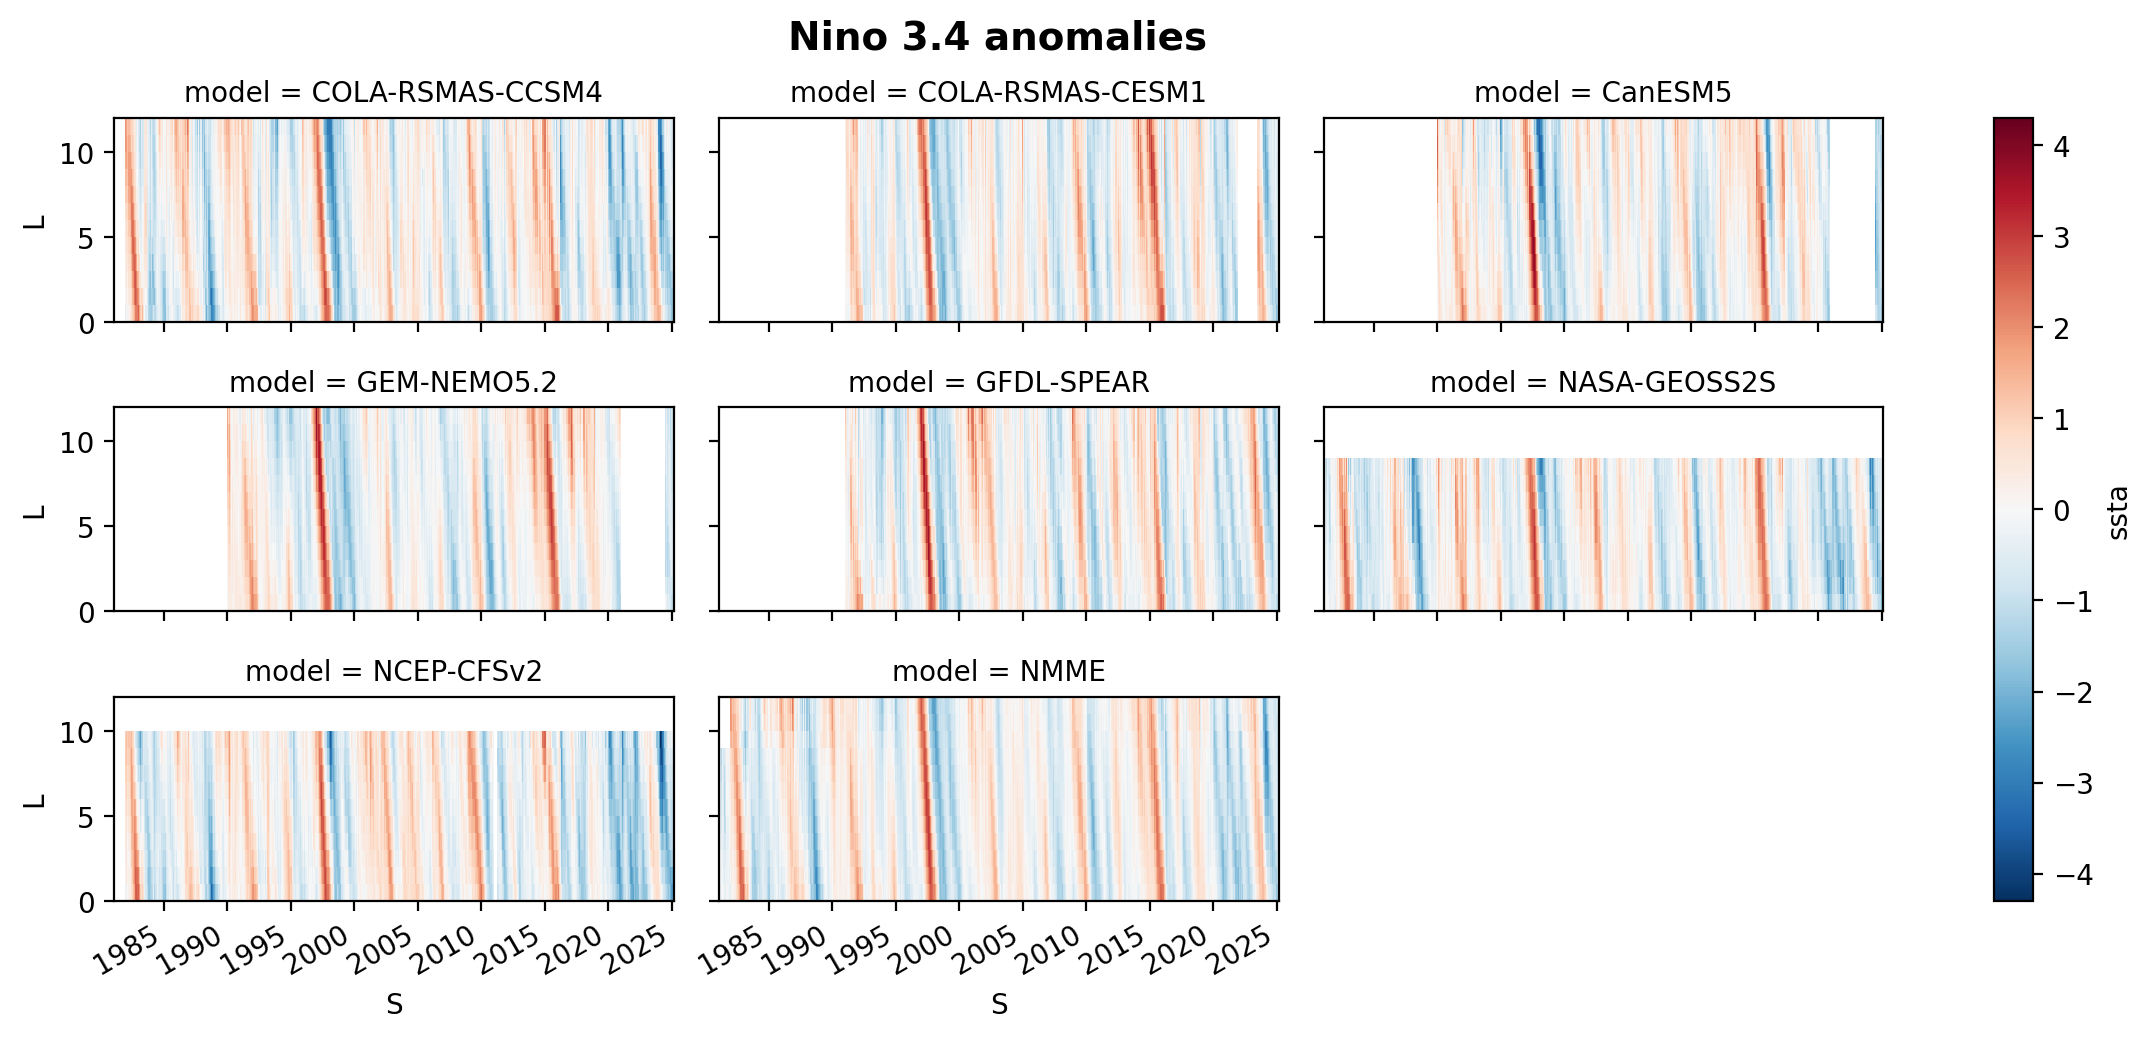

In [41]:
g = ensmNMME.ssta.plot(col='model', col_wrap = 3, x='S', figsize=(12, 5));  
fig = g.fig
fig.suptitle('Nino 3.4 anomalies', x = 0.42, y=1.03, fontsize=14, fontweight='bold');
fig.set_facecolor("white")
plt.show()

In [42]:
print(ensmNMME.model.values)

['COLA-RSMAS-CCSM4' 'COLA-RSMAS-CESM1' 'CanESM5' 'GEM-NEMO5.2'
 'GFDL-SPEAR' 'NASA-GEOSS2S' 'NCEP-CFSv2' 'NMME']


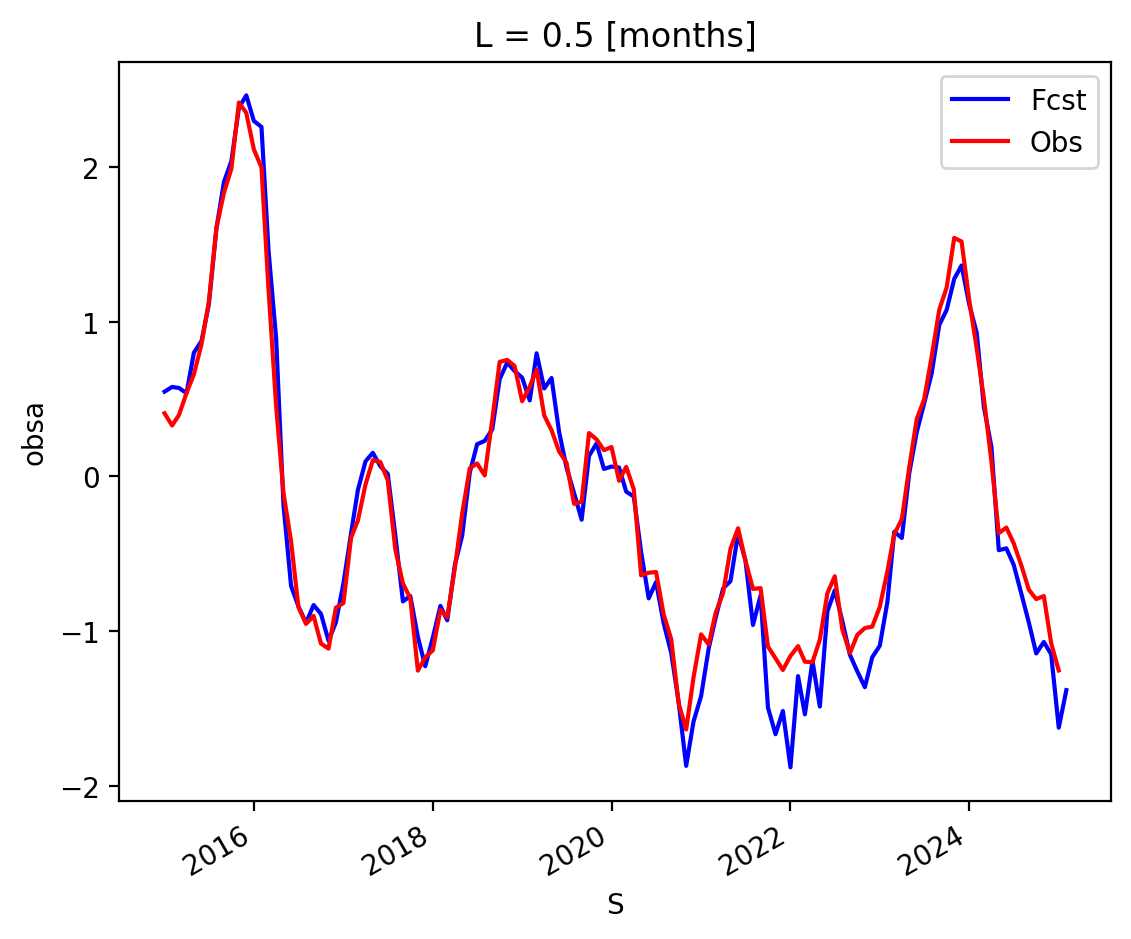

In [43]:
LDN = 0 # lead number (0 to 11)
MDN = 'NMME' 
#MDN = 'GFDL-SPEAR' 
#MDN = 'NCEP-CFSv2' 
ensmNMME.ssta.isel(L=LDN).sel(model=MDN).sel(S=slice('2015-01-01', '2025-02-01')).plot(x='S',color='blue',label="Fcst") 
ensmNMME.obsa.isel(L=LDN).sel(S=slice('2015-01-01', '2025-02-01')).plot(x='S',color='red',label="Obs") 
plt.legend()
plt.show()


## Plot out most recent model forecast

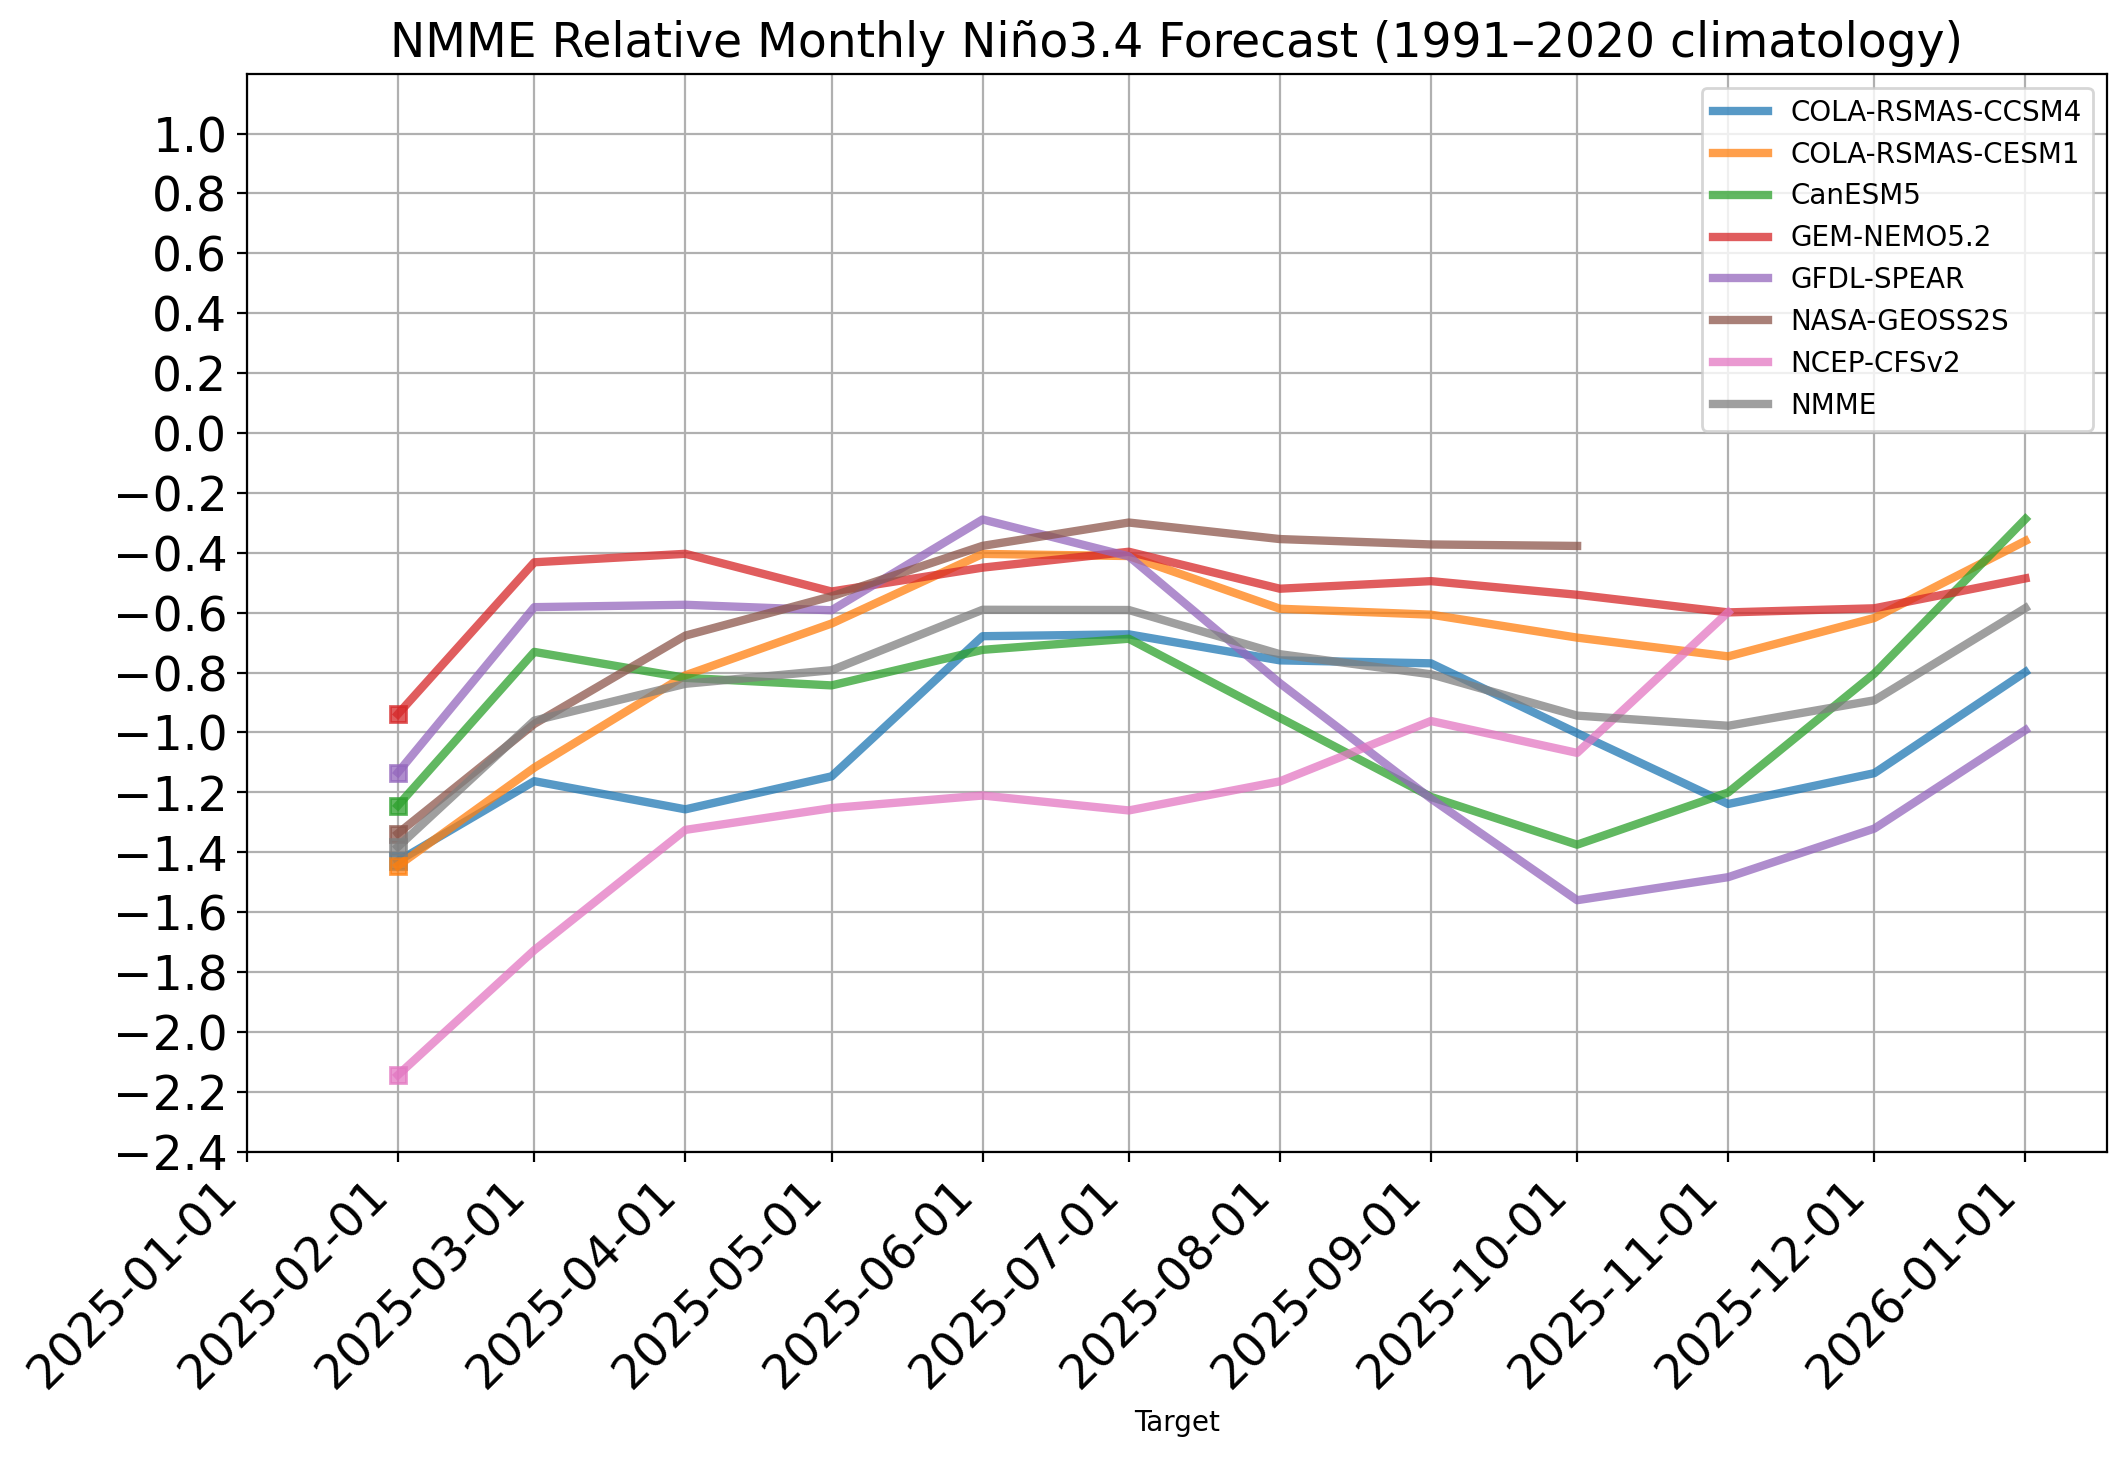

In [44]:
start = ensmNMME.indexes['S']
avail = np.where(~np.isnan(ensmNMME.ssta.isel(S=-1).isel(L=2)))

fig,ax = plt.subplots(figsize=(12, 7))
for im in avail[0]:
    leads = pd.date_range(start[-1], periods=12, freq="MS")
    ax.plot(leads, ensmNMME.ssta.isel(S=-1)[im, :], lw=3, color=colors[im], label=ensmNMME.model.values[im], alpha=0.75)
    ax.plot(leads[0], ensmNMME.ssta.isel(S=-1)[ im, 0], 's', lw=3, color=colors[im], alpha=0.75)
        
ax.tick_params(labelsize = 17)
ax.set_title('NMME Relative Monthly Niño3.4 Forecast (1991–2020 climatology)',fontsize=17)

xlabels = pd.date_range(start[-2], periods=13, freq="MS")
xlabels = xlabels.strftime('%Y-%m-%d')
ax.set_xticks(xlabels)
ax.set_xticklabels(labels=xlabels,rotation=45,ha='right', fontsize=17)       
ax.set_xlabel('Target')

ax.set_ylim(-2.4,1.2)
ax.set_yticks(np.arange(-2.4,1.2,.2))

ax.legend(ncol=1,loc='best')
ax.grid()
fig.set_facecolor("white")
xlim = ax.get_xlim()
plt.savefig('RelativeNino3.4_NMME.png',dpi=300)
